In [11]:
# Notebook config (run this first cell)
from pathlib import Path
import os, sys

BASE = Path(r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT")   # change if needed
DATA = BASE / "data"
IMAGES = DATA / "images"
POP = DATA / "population"
ROADS = DATA / "roads"
BOUNDARIES = DATA / "boundaries"
PROCESSED = DATA / "processed"
PATCHES = DATA / "patches"
OUTPUTS = BASE / "outputs"

# Create folders (safe)
for p in [PROCESSED, PATCHES, OUTPUTS, OUTPUTS/"maps", OUTPUTS/"charts"]:
    p.mkdir(parents=True, exist_ok=True)

print("Base:", BASE)
print("Images folder:", IMAGES)


Base: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT
Images folder: C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\images


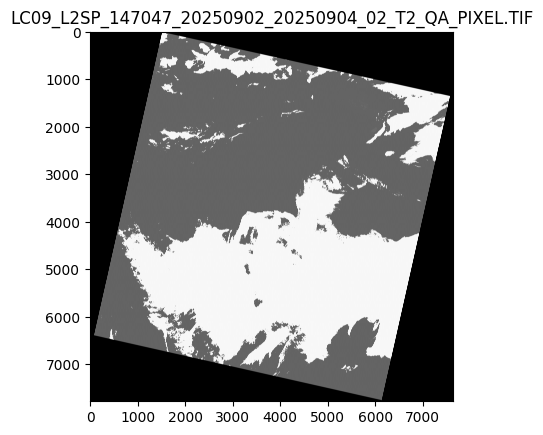

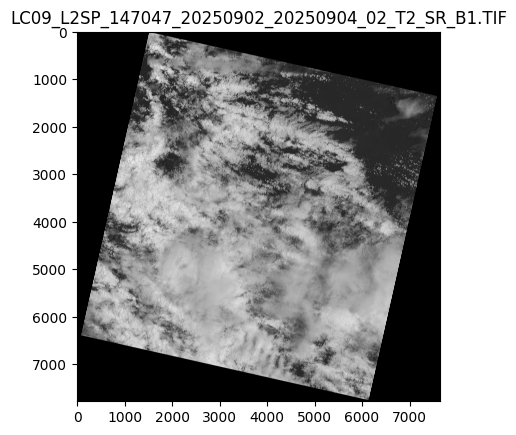

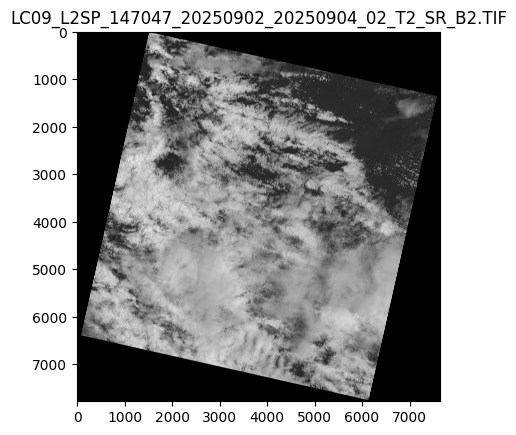

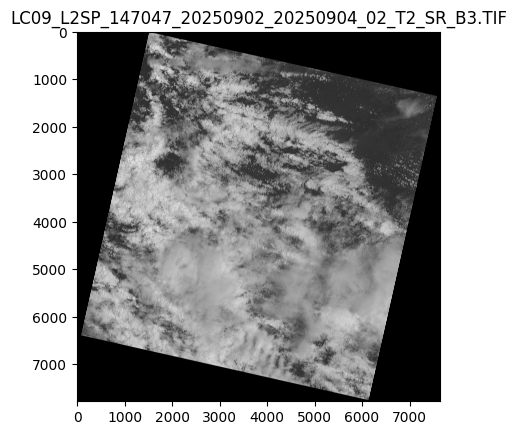

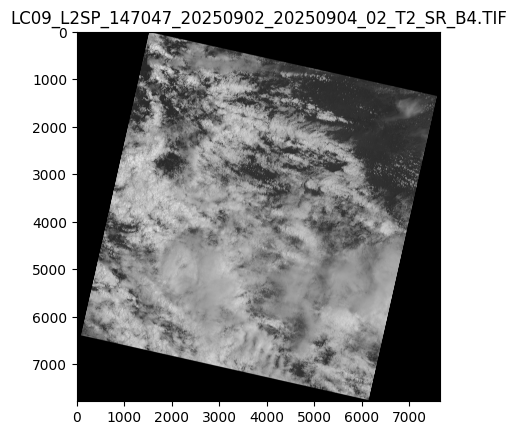

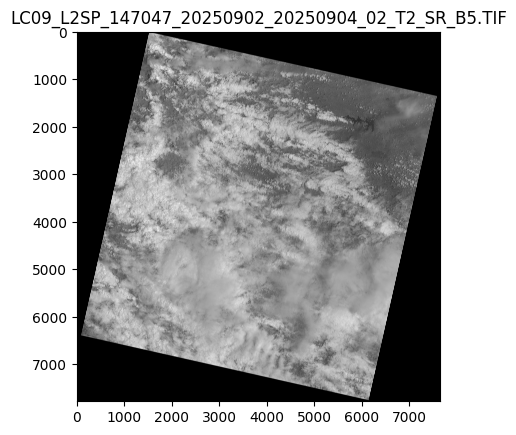

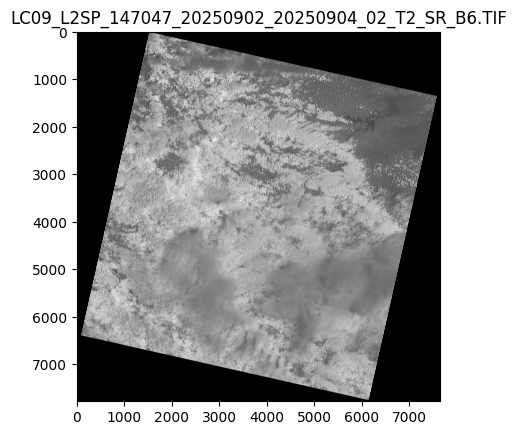

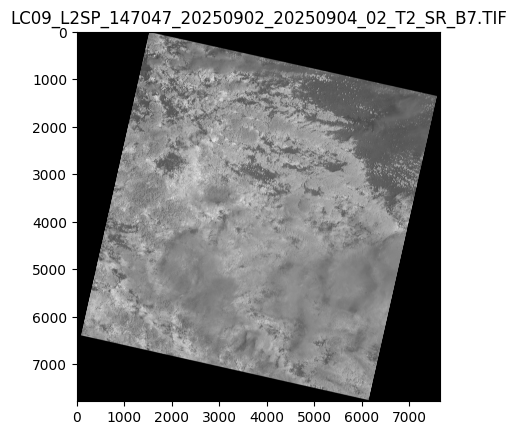

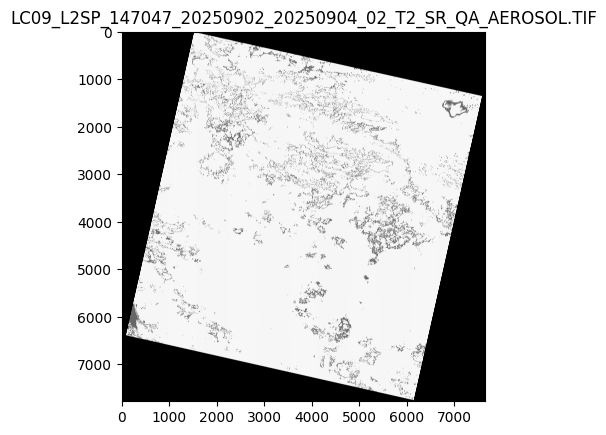

In [12]:
import rasterio
from matplotlib import pyplot as plt
import os

folder = IMAGES   # was: r"C:\Users\Lenovo\Desktop\LY MAJOR PROJECT\data\Pune Data"

for file in os.listdir(folder):
    if file.endswith('.TIF'):
        with rasterio.open(folder / file) as src:
            data = src.read(1)
        plt.imshow(data, cmap='gray')
        plt.title(file)
        plt.show()


In [13]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Band paths
band_paths = {
    "B1": IMAGES / "LC09_L2SP_147047_20250902_20250904_02_T2_SR_B1.TIF",
    "B2": IMAGES / "LC09_L2SP_147047_20250902_20250904_02_T2_SR_B2.TIF",
    "B3": IMAGES / "LC09_L2SP_147047_20250902_20250904_02_T2_SR_B3.TIF",  # Red
    "B4": IMAGES / "LC09_L2SP_147047_20250902_20250904_02_T2_SR_B4.TIF",  # NIR
    "B5": IMAGES / "LC09_L2SP_147047_20250902_20250904_02_T2_SR_B5.TIF",
    "B6": IMAGES / "LC09_L2SP_147047_20250902_20250904_02_T2_SR_B6.TIF",  # SWIR1
    "B7": IMAGES / "LC09_L2SP_147047_20250902_20250904_02_T2_SR_B7.TIF"
}


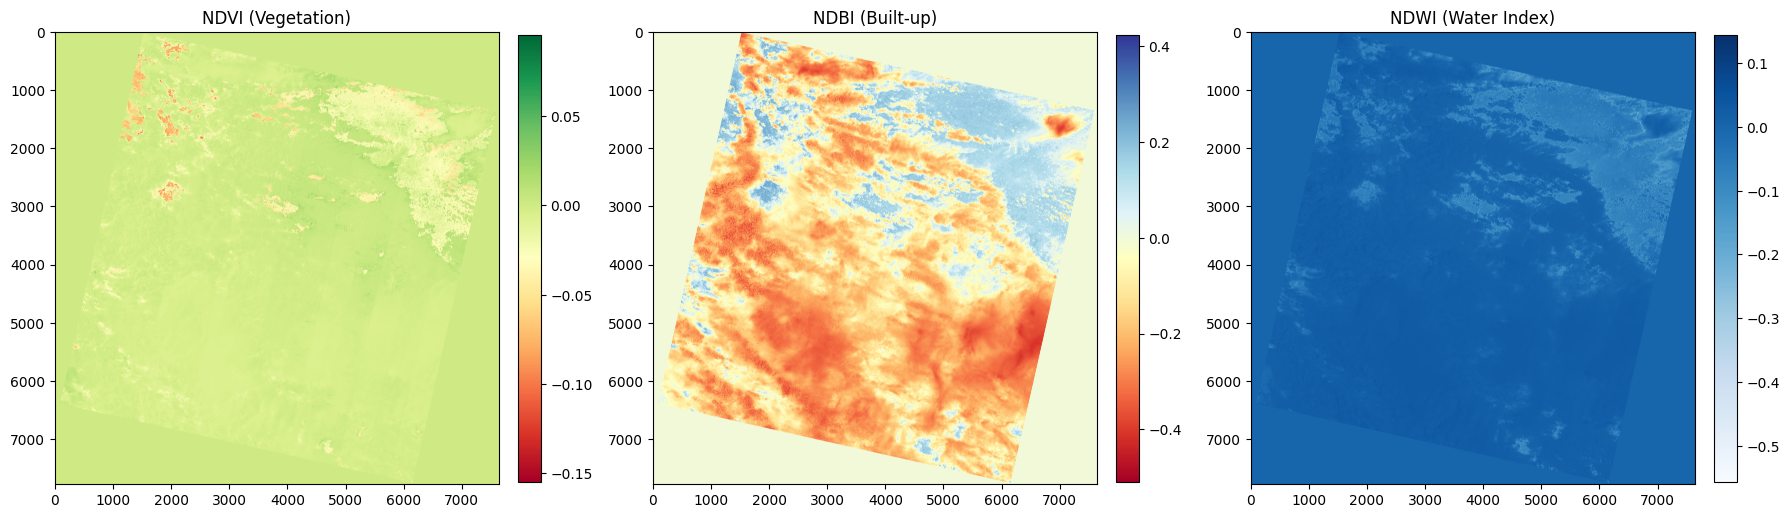

In [14]:
# Read bands
def read_band(path):
    with rasterio.open(path) as src:
        return src.read(1).astype("float32")

red = read_band(band_paths["B3"])
nir = read_band(band_paths["B4"])
green = read_band(band_paths["B2"])
swir = read_band(band_paths["B6"])

# Calculate indices
ndvi = (nir - red) / (nir + red + 1e-10)
ndbi = (swir - nir) / (swir + nir + 1e-10)
ndwi = (green - nir) / (green + nir + 1e-10)

# Plot results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(ndvi, cmap="RdYlGn")
axs[0].set_title("NDVI (Vegetation)")

axs[1].imshow(ndbi, cmap="RdYlBu")
axs[1].set_title("NDBI (Built-up)")

axs[2].imshow(ndwi, cmap="Blues")
axs[2].set_title("NDWI (Water Index)")

plt.colorbar(axs[0].images[0], ax=axs[0], fraction=0.046, pad=0.04)
plt.colorbar(axs[1].images[0], ax=axs[1], fraction=0.046, pad=0.04)
plt.colorbar(axs[2].images[0], ax=axs[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()
